In [43]:
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]

#simname = 'h148'
#s = pynbody.load('../../Data3/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096')
#simname = 'h229'
#s = pynbody.load('../Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096')
#simname = 'h242'
#s = pynbody.load('../Sims/h242.cosmo50PLK.3072gst5HbwK1BH/h242.cosmo50PLK.3072gst5HbwK1BH.004096/h242.cosmo50PLK.3072gst5HbwK1BH.004096')
simname = 'h329'
s = pynbody.load('../Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096')

h = s.halos(dummy=True)

In [44]:
sat_SM = []
sat_HM = []
host_SM = []
host_HM = []


for i in range(1,len(h)): 
    if not h[i].properties['n_star']==0:
        sm = h[i].properties['M_star']
        hm = h[i].properties['mass']
        print(str(i)+":",sm,hm)
        if h[i].properties['hostHalo'] == -1:
            host_SM.append(sm) # add back to magnitude list
            host_HM.append(hm)
        else:
            sat_SM.append(sm)
            sat_HM.append(hm)
    
sat_SM = np.array(sat_SM,dtype='float32')
sat_HM = np.array(sat_HM,dtype='float32')
host_SM = np.array(host_SM,dtype='float32')
host_HM = np.array(host_HM,dtype='float32')

1: 60943700000.0 525117000000.0
8: 10444500.0 16374500000.0
9: 18619200.0 3476070000.0
13: 7441020.0 30790300000.0
14: 2782810.0 6448230000.0
19: 392110 5486170000.0
25: 1572830.0 12868000000.0
31: 74301.3 1015350000.0
32: 1010530.0 998332000.0
40: 176591 759377000.0
47: 241629 9676090000.0
63: 6657.83 488973000.0
92: 88859.4 3628470000.0
99: 89945.8 250303000.0
126: 743260 178860000.0
129: 2090150.0 163375000.0
135: 47771.4 167134000.0
170: 29985.6 133711000.0
195: 197269 1955840000.0
444: 413876 39937900.0
686: 3328.91 26774000.0
942: 53273.7 18551400.0
1418: 33308.5 11838800.0


In [45]:
import pandas as pd
df = pd.DataFrame({"sat_HM" : sat_HM, "sat_SM" : sat_SM})
df.to_csv("../csvs/sat_shm_%s.csv" % simname, index=False)
df = pd.DataFrame({"host_HM": host_HM, "host_SM": host_SM})
df.to_csv("../csvs/host_shm_%s.csv" % simname, index=False)

In [46]:
colnames = ['sat_HM', 'sat_SM']
data = pd.read_csv("../csvs/sat_shm_%s.csv" % simname, names=colnames)
sat_HM  = np.array(data.sat_HM.tolist()[1:],  dtype='float32')
sat_SM  = np.array(data.sat_SM.tolist()[1:],  dtype='float32')
colnames = ['host_HM', 'host_SM']
data = pd.read_csv("../csvs/host_shm_%s.csv" % simname, names=colnames)
host_HM = np.array(data.host_HM.tolist()[1:], dtype='float32')
host_SM = np.array(data.host_SM.tolist()[1:], dtype='float32')

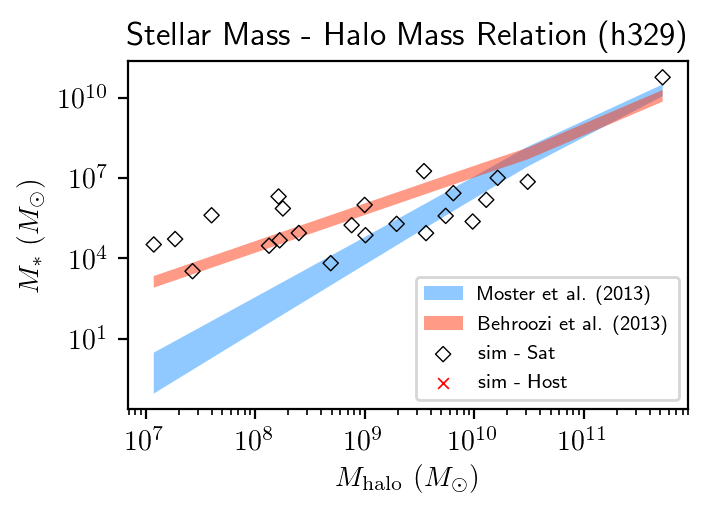

In [47]:
mpl.rc('text', usetex=True)

plt.figure(figsize=(4,3),dpi=200)

HM = np.sort(np.append(sat_HM,host_HM))
m_SM, m_errors = pynbody.plot.stars.moster(HM,0)
b_SM, b_errors = pynbody.plot.stars.behroozi(HM,0)
plt.fill_between(HM,np.array(m_SM)/np.array(m_errors),y2=np.array(m_SM)*np.array(m_errors),facecolor='#2395ff',edgecolor='none',alpha=0.5,label='Moster et al. (2013)')
plt.fill_between(HM,np.array(b_SM)/np.array(b_errors),y2=np.array(b_SM)*np.array(b_errors),facecolor='#ff3611',edgecolor='none',alpha=0.5,label='Behroozi et al. (2013)')
plt.scatter(sat_HM, sat_SM, label='sim - Sat', marker='D',linewidth=0.5,s=15,facecolors='none',edgecolors='k')
plt.scatter(host_HM,host_SM,label='sim - Host',marker='x',linewidth=0.6,s=15,facecolors='r',edgecolors='none')
plt.xlabel(r'$M_{\mathrm{halo}} \ (M_{\odot})$')
plt.ylabel(r'$M_{\mathrm{*}} \ (M_{\odot})$')
plt.title(r"Stellar Mass - Halo Mass Relation (%s)" % simname)
plt.loglog()
plt.legend(loc=4, prop={'size': 7})
plt.gcf().subplots_adjust(bottom=0.3)
plt.gcf().subplots_adjust(left=0.2)
plt.savefig('../Plots/shm_%s.png' % simname,dpi=300)
plt.show()
